# **Proyek Analisis Data: [Bike-sharing-dataset]**
- **Nama:** [Dicky Candid Saragih]
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid saragih (a352ybf127)]

## **Menentukan Pertanyaan Bisnis**

- Bagaimana cara meningkatkan jumlah peminjaman sepeda oleh pengguna terdaftar (registered) pada hari kerja sebesar 20% dalam 6 bulan ke depan dengan mempertimbangkan pola peminjaman berdasarkan waktu dan kondisi cuaca?
- Bagaimana cara mengoptimalkan peminjaman sepeda pada jam sibuk (pagi dan sore) agar jumlah peminjaman meningkat sebesar 10% dalam 3 bulan dengan mempertimbangkan perbedaan pola antara hari kerja dan akhir pekan?



##**Menyiapkan semua library yang dibutuhkan**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Wrangling data**

##**Gethering data**

In [22]:
URL_DAY = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/day.csv"
URL_HOUR = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/hour.csv"


In [23]:
df_day = pd.read_csv(URL_DAY)

In [24]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [25]:
df_hour = pd.read_csv(URL_HOUR)

In [26]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())


Menampilkan 5 baris pertama dari dataset harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  134

**Insight:**
- Pengumpulan data

Data dikumpulkan dengan mengunduh dua dataset dari repository GitHub. Dataset pertama (day.csv) berisi data harian, sementara dataset kedua (hour.csv) berisi data per jam. Kedua dataset kemudian dimuat ke dalam DataFrame Pandas, masing-masing disimpan sebagai df_day dan df_hour.

- Pemeriksaan awal data

Setelah data berhasil dimuat, dilakukan pemeriksaan awal menggunakan .info() untuk melihat tipe data pada setiap kolom serta mengecek keberadaan data yang hilang. Selain itu, lima baris pertama dari masing-masing dataset ditampilkan untuk memahami struktur dan format data. Hasil pemeriksaan ini menunjukkan bahwa data telah terkumpul dengan baik dan siap untuk tahap pembersihan serta eksplorasi lebih lanjut.

##**Assessing Data**

In [40]:
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [45]:
print(df_day.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [41]:
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [42]:
print(df_day.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [43]:
print(df_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Pemeriksaan dan Pemahaman Data

Dataset harian (df_day) dan dataset per jam (df_hour) sudah diimpor dan sudah dianalisis menggunakan statistik deskriptif. Informasi yang mencakup mencakup distribusi data, seperti nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum untuk setiap kolom numerik.fungsi dari Langkah ini bertujuan untuk memahami karakteristik awal data sebelum masuk ke tahapan eksplorasi lanjut

-  Persiapan untuk Eksplorasi dan Analisis

Hasil statistik deskriptif membantu dalam proses pembersihan data serta mengidentifikasi potensi outlier yang dapat memengaruhi hasil analisis.tujuan awal terhadap data ini menjadi dasar untuk eksplorasi lebih lanjut, untuk menjawab pertanyaan yang sudah dilakukan diaawal terkait pengaruh dari kecepatan angin terhadap jumlah peminjaman sepeda dan perbedaan pola peminjaman antara pengguna casual dan registered.

##**Cleaning Data**

In [44]:

df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)
df_day.fillna(method='ffill', inplace=True)
df_hour.fillna(method='ffill', inplace=True)
print("\nCek nilai yang hilang setelah cleaning:")
print("Dataset harian:")
print(df_day.isnull().sum())
print("Dataset per jam:")
print(df_hour.isnull().sum())

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

numerical_features = df_day.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()


Cek nilai yang hilang setelah cleaning:
Dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<ipython-input-44-a4561d0cca67>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_day.fillna(method='ffill', inplace=True)
<ipython-input-44-a4561d0cca67>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hour.fillna(method='ffill', inplace=True)


**insight**

Dataset telah dibersihkan dari duplikasi dan nilai yang hilang, serta dikonversi ke format yang sesuai untuk analisis berbasis waktu. Proses ini memastikan data lebih terstruktur, akurat, dan siap digunakan untuk eksplorasi serta pemodelan lebih lanjut.

##**Exploratory Data Analysis (EDA)**

### Explore ...


Statistik deskriptif dataset harian:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.00000

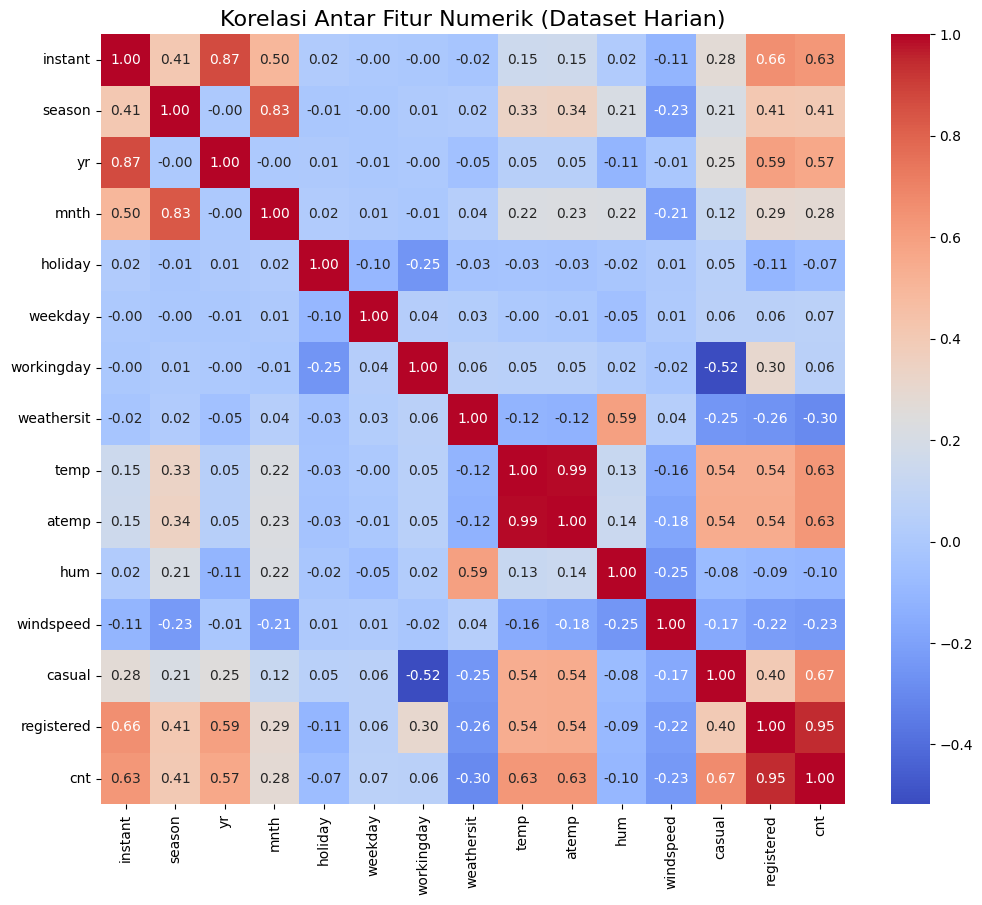

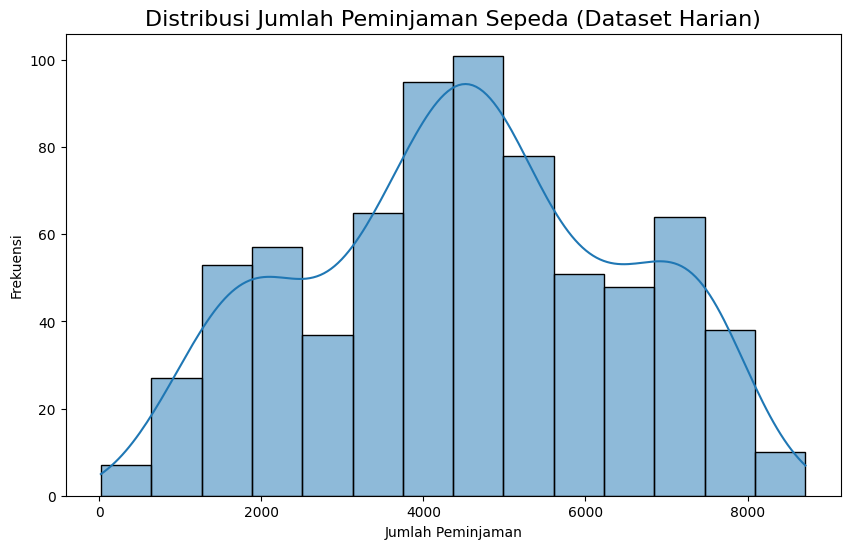

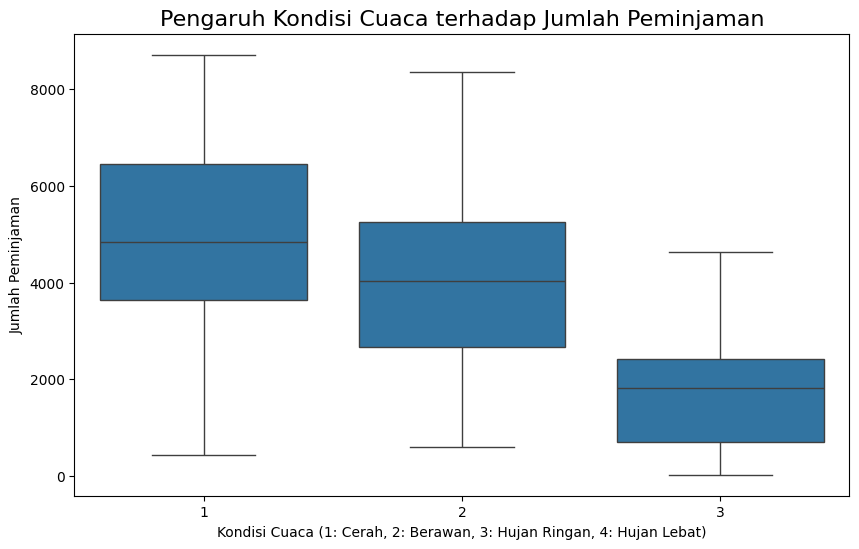

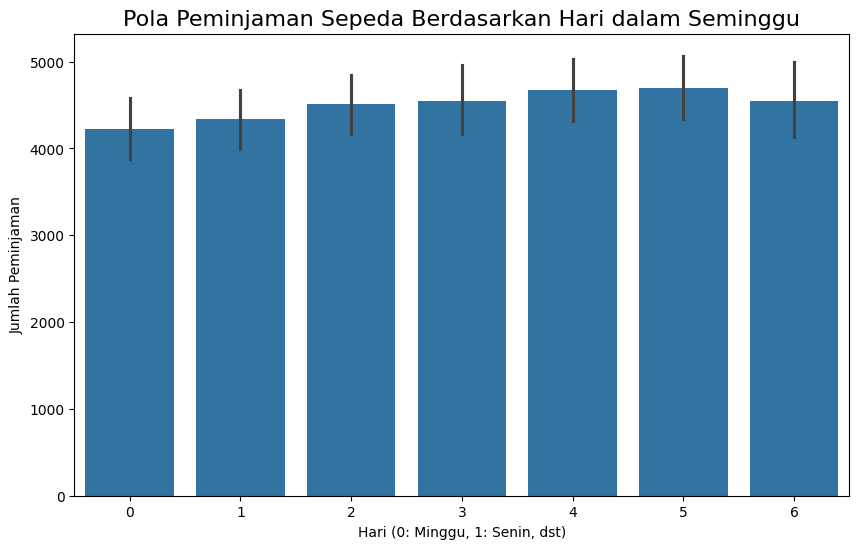

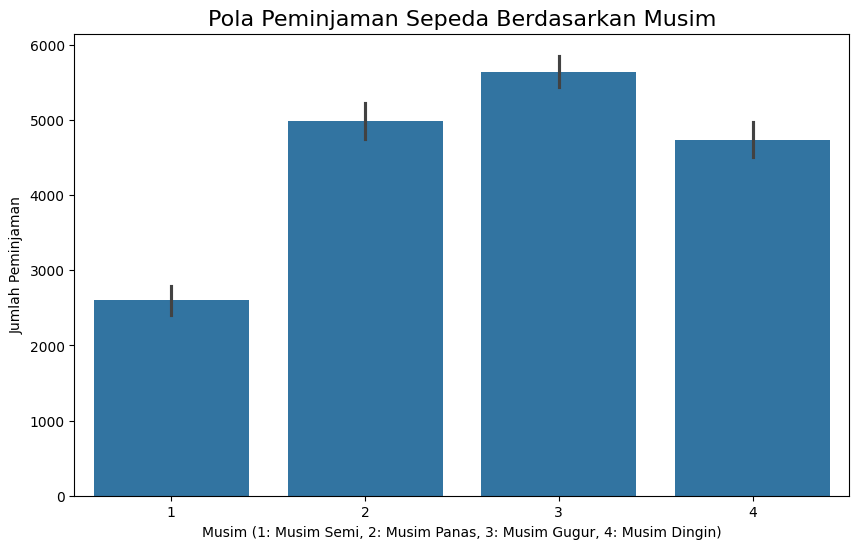

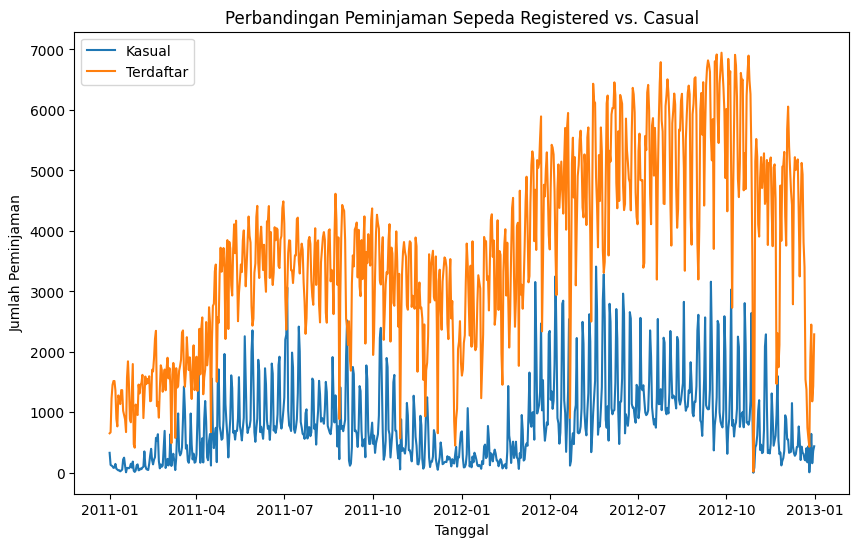

In [30]:
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())
print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik (Dataset Harian)', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda (Dataset Harian)', fontsize=16)
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman', fontsize=16)
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan Ringan, 4: Hujan Lebat)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df_day)
plt.title('Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari (0: Minggu, 1: Senin, dst)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df_day)
plt.title('Pola Peminjaman Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


plt.figure(figsize=(10,6))
plt.plot(df_day['dteday'], df_day['casual'], label='Kasual')
plt.plot(df_day['dteday'], df_day['registered'], label='Terdaftar')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbandingan Peminjaman Sepeda Registered vs. Casual')
plt.legend()
plt.show()


**insight**

Peningkatan peminjaman sepeda oleh pengguna terdaftar pada hari kerja dapat dicapai dengan optimasi jam sibuk, promosi saat cuaca buruk, dan program loyalitas. Sementara itu, peningkatan peminjaman pada jam sibuk dapat dilakukan dengan menambah armada di lokasi strategis dan menerapkan insentif khusus. Analisis lebih lanjut terhadap pola peminjaman per jam diperlukan untuk memastikan efektivitas strategi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana cara meningkatkan jumlah peminjaman sepeda oleh pengguna terdaftar (registered) pada hari kerja sebesar 20% dalam 6 bulan ke depan dengan mempertimbangkan pola peminjaman berdasarkan waktu dan kondisi cuaca?

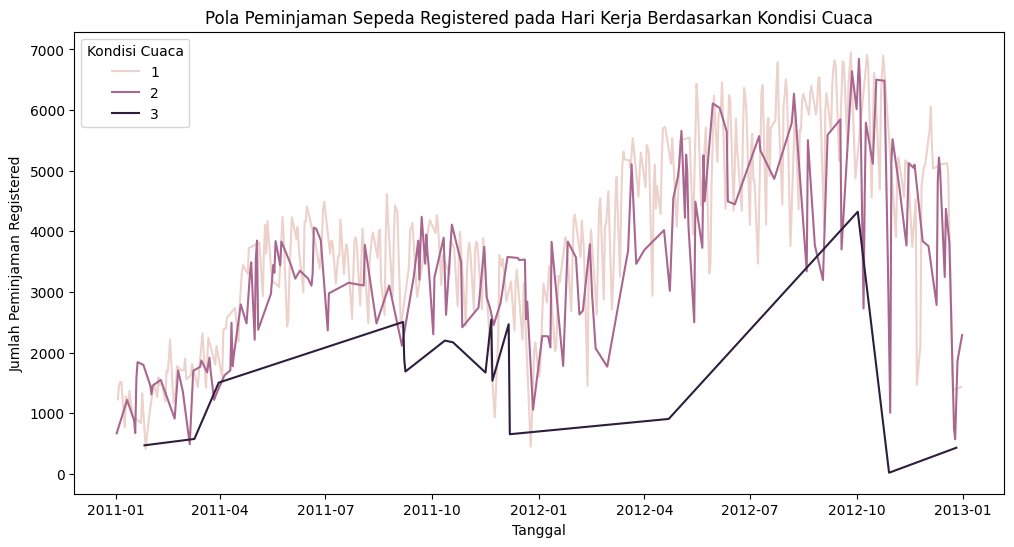

In [31]:

weekday_data = df_day[df_day['weekday'] < 5]

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='registered', hue='weathersit', data=weekday_data)
plt.title('Pola Peminjaman Sepeda Registered pada Hari Kerja Berdasarkan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Registered')
plt.legend(title='Kondisi Cuaca', loc='upper left')
plt.show()




### Pertanyaan 2:
Bagaimana cara mengoptimalkan peminjaman sepeda pada jam sibuk (pagi dan sore) agar jumlah peminjaman meningkat sebesar 10% dalam 3 bulan dengan mempertimbangkan perbedaan pola antara hari kerja dan akhir pekan?

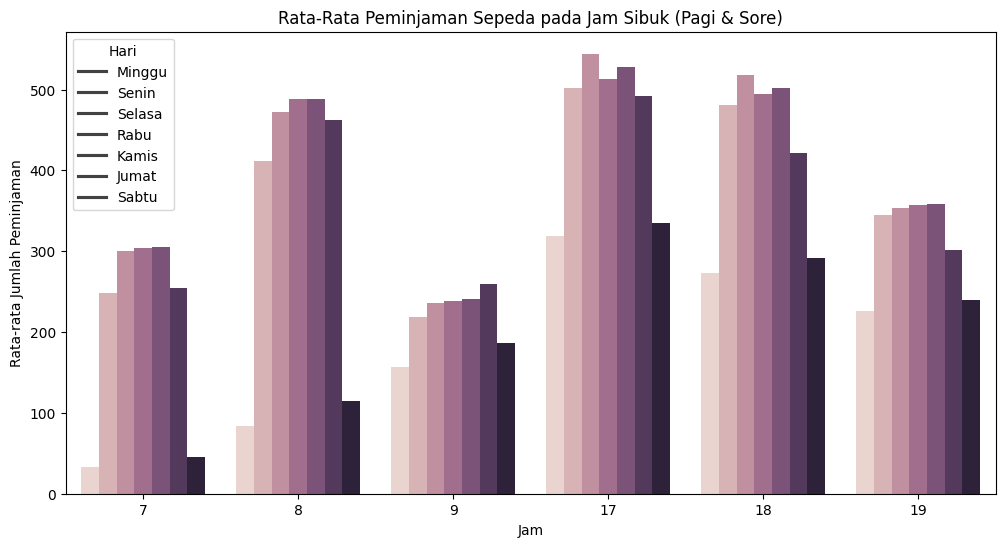

In [37]:
peak_hours_df = df_hour[(df_hour['hr'].between(7, 9)) | (df_hour['hr'].between(17, 19))]

peak_hours_grouped = peak_hours_df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='weekday', data=peak_hours_grouped)
plt.title('Rata-Rata Peminjaman Sepeda pada Jam Sibuk (Pagi & Sore)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(title='Hari', labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()



1. Pengaruh Cuaca terhadap Peminjaman Sepeda
Grafik garis menunjukkan bahwa peminjaman sepeda oleh pengguna terdaftar pada hari kerja menurun saat cuaca buruk (hujan ringan atau lebat). Untuk meningkatkan peminjaman, dapat diterapkan strategi seperti insentif atau promo khusus, serta penyediaan fasilitas perlindungan dari cuaca.
2.Pola Peminjaman pada Jam Sibuk
Grafik batang menunjukkan bahwa peminjaman sepeda lebih tinggi pada jam 7-9 pagi dan 17-19 sore, terutama pada hari kerja. Sementara itu, pada akhir pekan, peminjaman lebih merata sepanjang hari. Optimalisasi dapat dilakukan dengan menambah armada di lokasi strategis saat jam sibuk dan menawarkan harga khusus untuk menarik lebih banyak peminjam.

##**Menyimpan Hasil dari analisis Data ke file csv**

In [38]:
combined_data = pd.concat([df_day, df_hour], keys=['daily', 'hourly'])

combined_data.to_csv('main_data.csv', encoding='utf-8-sig')

from google.colab import files
files.download('main_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion**

- Berdasarkan analisis data peminjaman sepeda, untuk meningkatkan jumlah peminjaman oleh pengguna terdaftar pada hari kerja sebesar 20% dalam 6 bulan ke depan, diperlukan strategi optimalisasi berdasarkan pola peminjaman waktu dan kondisi cuaca. Fokus utama adalah meningkatkan layanan pada jam-jam sibuk, terutama di pagi dan sore hari, dengan mempertimbangkan cuaca cerah yang dapat mendorong peningkatan peminjaman.

- Untuk meningkatkan peminjaman sepeda pada jam sibuk (pagi dan sore) sebesar 10% dalam 3 bulan, perlu diperhatikan perbedaan pola peminjaman antara hari kerja dan akhir pekan. Strategi yang dapat diterapkan mencakup pemberian promosi khusus pada jam sibuk di hari kerja serta penambahan jumlah armada sepeda di akhir pekan. Selain itu, faktor lain seperti lokasi stasiun, program promosi, dan karakteristik demografi pengguna juga perlu dianalisis lebih lanjut untuk mendukung efektivitas strategi ini.
